In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
import matplotlib.pyplot as plt
from model import CNN2D
from model import train
from model import test

/Users/bahador/anaconda3/envs/dl_py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

Bad key code in file /Users/bahador/.matplotlib/matplotlibrc, line 1 ('code: backend: TkAgg')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

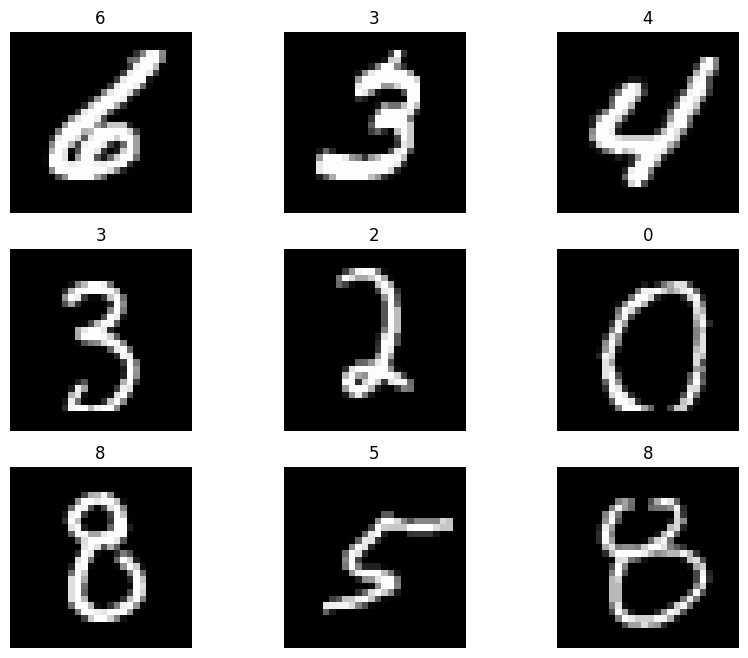

In [3]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:

train_loader = DataLoader(
    train_data, 
    batch_size=100, 
    shuffle=True, 
    num_workers=1
)
test_loader = DataLoader(
    test_data, 
    batch_size=100, 
    shuffle=True, 
    num_workers=1
)

In [5]:
cnn = CNN2D()
loss_func = CrossEntropyLoss() 
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   

In [6]:
num_epochs = 1
for epoch in range(num_epochs):
    epoch_loss = 0.
    for i, (images, labels) in enumerate(train_loader):
        btch_loss = train(optimizer, cnn, images, labels, loss_func)
        epoch_loss += btch_loss
        print(epoch, btch_loss)

0 2.3073267936706543
0 2.2370381355285645
0 2.0862154960632324
0 1.7195634841918945
0 1.246767520904541
0 1.2212674617767334
0 1.2595946788787842
0 1.2524482011795044
0 0.6867090463638306
0 0.8106984496116638
0 0.8176700472831726
0 0.6514449119567871
0 0.690657377243042
0 0.5820364952087402
0 0.5160338878631592
0 0.7226642370223999
0 0.46396899223327637
0 0.6389291882514954
0 0.5202537178993225
0 0.34050440788269043
0 0.42408818006515503
0 0.2944697439670563
0 0.31601035594940186
0 0.6421179175376892
0 0.2659364342689514
0 0.3243042826652527
0 0.2528414726257324
0 0.448104590177536
0 0.3228033185005188
0 0.4292992651462555
0 0.1685275435447693
0 0.25139009952545166
0 0.452921599149704
0 0.15633109211921692
0 0.1646854281425476
0 0.2153092622756958
0 0.16182538866996765
0 0.32710638642311096
0 0.25580012798309326
0 0.23707817494869232
0 0.2583007514476776
0 0.3300827741622925
0 0.13959912955760956
0 0.1817731410264969
0 0.16514232754707336
0 0.08178240060806274
0 0.13843370974063873
0 0

In [7]:
correct = 0
total = 0
for images, labels in test_loader:
    acc = test(cnn, images, labels)
    print(acc)

0.99
0.99
0.99
0.99
0.98
0.97
1.0
1.0
0.99
1.0
0.98
1.0
0.99
0.96
1.0
1.0
0.97
1.0
0.99
0.99
0.98
0.99
0.98
0.96
0.97
1.0
0.97
0.98
0.97
1.0
0.98
0.99
0.98
1.0
0.97
1.0
0.99
0.99
0.97
0.96
1.0
0.97
0.95
0.98
0.97
0.95
0.98
1.0
1.0
1.0
1.0
1.0
1.0
0.98
0.98
0.99
0.99
0.98
0.98
1.0
0.99
0.99
0.96
1.0
0.98
0.98
0.98
0.98
1.0
0.99
1.0
0.98
0.98
0.99
0.98
1.0
1.0
1.0
0.99
0.98
0.99
0.98
1.0
0.96
0.98
0.99
1.0
0.96
0.99
0.99
0.97
0.98
0.95
0.99
0.99
1.0
1.0
0.96
0.98
0.98
